K-NN Test Accuracy: 1.0000
Test Error: 0.0000
AUC Score: 1.0000
Sensitivity (Recall): 1.0000
Specificity: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[17  0]
 [ 0 13]]


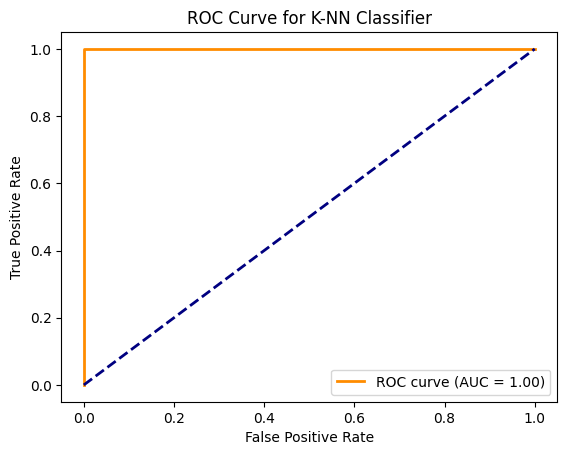


Cross-Validation Results:
CV Accuracy: 1.0000


In [1]:
# K-NN Classifier (Q8) with AUC, Error, and Specificity
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc,
    recall_score
)
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Binary classification (for AUC, simplify to 2 classes)
X = X[y != 2]
y = y[y != 2]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train K-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]

# Calculate metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
error = 1 - accuracy
specificity = tn / (tn + fp)  # Specificity = TN / (TN + FP)
sensitivity = recall_score(y_test, y_pred)  # Sensitivity = Recall
auc_score = roc_auc_score(y_test, y_proba)

print(f"K-NN Test Accuracy: {accuracy:.4f}")
print(f"Test Error: {error:.4f}")
print(f"AUC Score: {auc_score:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-NN Classifier')
plt.legend(loc="lower right")
plt.show()

# Cross-Validation (5-fold)
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

cv_accuracy = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print("\nCross-Validation Results:")
print(f"CV Accuracy: {np.mean(cv_accuracy):.4f}")
